<a href="https://colab.research.google.com/github/aduvvuri007/House-Price-Predictor/blob/main/HousePricesPredicitor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Datasets/Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
missing_values = df.isnull().sum()


print("Missing values:\n", missing_values)

Missing values:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression

obj_cols = df.select_dtypes(exclude=np.number).columns

for col in obj_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

X = df.drop(['price'], axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('kNearestNeighbor')
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the KNN model
knn = KNeighborsRegressor(n_neighbors=10)  # You can adjust the number of neighbors
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

kNearestNeighbor
Mean Squared Error: 2076497725020.5872
R-squared: 0.5891841197545793


In [ ]:
from sklearn.model_selection import cross_val_score

k_values = range(1, 31)
cv_scores = []

# Perform cross-validation for each k
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_scores.append(scores.mean())

# Convert scores to positive
cv_scores = np.abs(cv_scores)

# Determine the best k (lowest mean squared error)
optimal_k = k_values[np.argmin(cv_scores)]
print(f'The optimal number of neighbors is {optimal_k}')

The optimal number of neighbors is 10


In [ ]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison)

      Actual  Predicted
316  4060000  4356100.0
77   6650000  7930300.0
360  3710000  3494400.0
90   6440000  4304300.0
493  2800000  3517500.0
..       ...        ...
15   9100000  4151000.0
357  3773000  3251500.0
39   7910000  7258594.0
54   7350000  6684300.0
155  5530000  5903800.0

[109 rows x 2 columns]


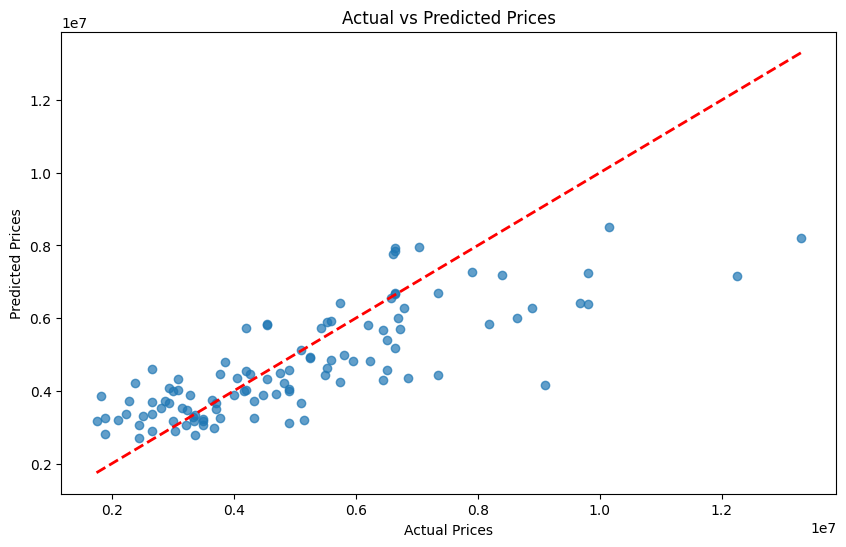

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

# Feature Engineering

In [ ]:
df['total_rooms'] = df['bedrooms'] + df['bathrooms'] + df['stories']
df['special_features'] = df[['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']].sum(axis=1)
df['bed_bath'] = df['bedrooms'] * df['bathrooms']
df['area_bed'] = df['area'] * df['bedrooms']
df['bath_stories'] = df['bathrooms'] + df['stories']
df['composite_index'] = df['area'] * df['bedrooms'] * (df['bathrooms'] + 1) * df['stories']
# df['room_density'] = df['area'] / (df['bedrooms'] + df['bathrooms'] + df['stories'])
# df['luxury_score'] = df['guestroom'] + df['basement'] + df['hotwaterheating'] + df['airconditioning'] + df['prefarea']
# df['story_bedroom_ratio'] = df['stories'] / df['bedrooms']
# df['airconditioned_area'] = df['area'] * df['airconditioning']
# df['parking_bedroom_ratio'] = df['parking'] / df['bedrooms']
# df['basement_area_indicator'] = df['basement'] * df['area']
# df['comfort_composite'] = df['guestroom'] + df['airconditioning'] + df['hotwaterheating'] + df['prefarea']
# df['area_per_parking'] = df['area'] / (df['parking'] + 1)
# df['bathroom_density'] = df['bathrooms'] / df['area']
# df['area_mainroad_interaction'] = df['area'] * df['mainroad']

# Scale features if necessary
scaler = StandardScaler()
df['scaled_area'] = scaler.fit_transform(df[['area']])

# Prepare features and target variable
X = df.drop(['price'], axis=1)
y = df['price']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('kNearestNeighbor')
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the KNN model
knn = KNeighborsRegressor(n_neighbors=10)  # You can adjust the number of neighbors
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

kNearestNeighbor
Mean Squared Error: 2148734636663.8074
R-squared: 0.574892714526757


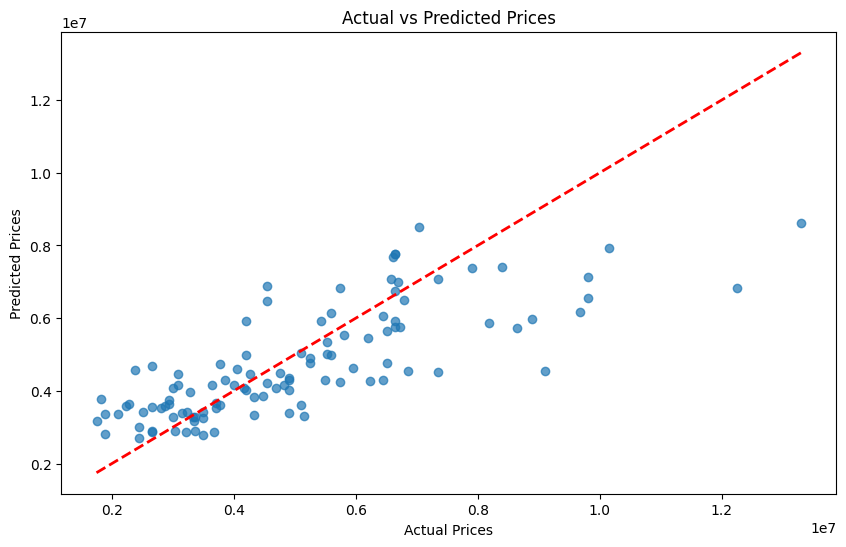

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

The optimal number of neighbors is 15


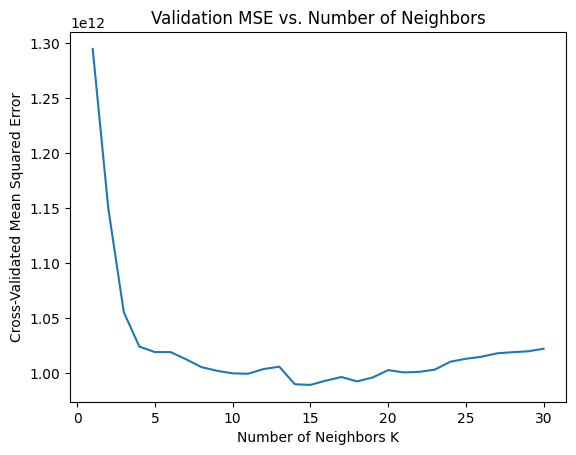

Mean Squared Error for Price: 2126122980399.8943
Mean Squared Error for Area: 1230433.4369011212
R-squared for Price: 0.5793662217018127
R-squared for Area: 0.7008193458480985


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multioutput import MultiOutputRegressor
import matplotlib.pyplot as plt

X = df.drop(['price', 'area'], axis=1)
y = df[['price', 'area']]

# Perform one-hot encoding for categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Find the optimal number of neighbors
k_values = range(1, min(31, X_scaled.shape[0]))  # Test up to 30 or the number of samples, whichever is smaller
cv_scores = []

# Perform 10-fold cross-validation for each k
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    multi_output_knn = MultiOutputRegressor(knn)
    scores = cross_val_score(multi_output_knn, X_scaled, y, cv=10, scoring='neg_mean_squared_error')
    cv_scores.append(-scores.mean())  # Convert negative MSE to positive for scoring

# Find the optimal k (the one with the lowest mean cross-validation score)
optimal_k = k_values[np.argmin(cv_scores)]
print(f"The optimal number of neighbors is {optimal_k}")

# Plot the validation scores
plt.plot(k_values, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Cross-Validated Mean Squared Error')
plt.title('Validation MSE vs. Number of Neighbors')
plt.show()

# Train the final model with the optimal number of neighbors
knn = KNeighborsRegressor(n_neighbors=optimal_k)
multi_output_knn = MultiOutputRegressor(knn)
multi_output_knn.fit(X_train, y_train)

# Make predictions
y_pred = multi_output_knn.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
r2 = r2_score(y_test, y_pred, multioutput='raw_values')

print(f'Mean Squared Error for Price: {mse[0]}')
print(f'Mean Squared Error for Area: {mse[1]}')
print(f'R-squared for Price: {r2[0]}')
print(f'R-squared for Area: {r2[1]}')

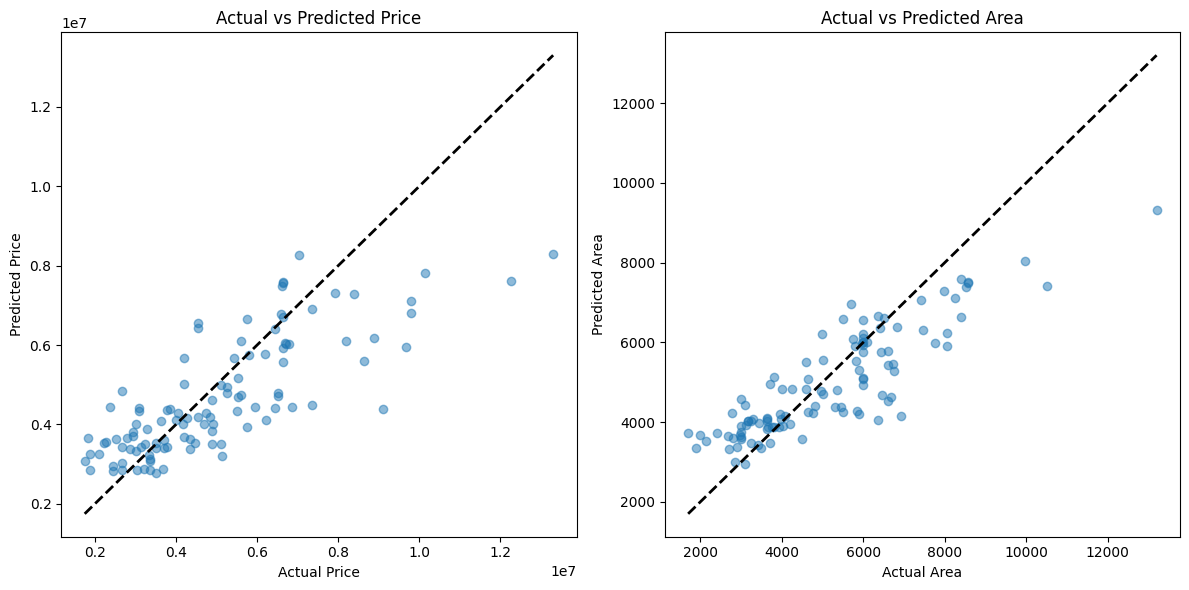

In [ ]:
# Plot actual vs. predicted values for Price
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test['price'], y_pred[:, 0], alpha=0.5)
plt.plot([y_test['price'].min(), y_test['price'].max()], [y_test['price'].min(), y_test['price'].max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')

# Plot actual vs. predicted values for Area
plt.subplot(1, 2, 2)
plt.scatter(y_test['area'], y_pred[:, 1], alpha=0.5)
plt.plot([y_test['area'].min(), y_test['area'].max()], [y_test['area'].min(), y_test['area'].max()], 'k--', lw=2)
plt.xlabel('Actual Area')
plt.ylabel('Predicted Area')
plt.title('Actual vs Predicted Area')

plt.tight_layout()
plt.show()